In [18]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from methods.training_methods import GradientDescent
from methods.step_methods import ConstantLearningRateStep, MomentumStep, ADAgradStep, RMSpropStep, AdamStep
from methods.regression_methods import OLS_Gradient, Ridge_Gradient, Lasso_Gradient
from sklearn.preprocessing import PolynomialFeatures
from utils import generate_dataset

In [19]:
# Generating dataset
np.random.seed(124)
x, y = generate_dataset()

In [20]:
p = 6
X = PolynomialFeatures(p,include_bias = False).fit_transform(x.reshape(-1, 1))
num_features = X.shape[1]

#np.random.seed(1234)
theta = np.random.uniform(-1, 1, X.shape[1])
iterations = 20000

In [21]:
# OLS

# Adam, RMSprop, ADAgrad, momentum, constant

iterations = 10**4

gd_constant = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.2))
gd_momentum = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.3, momentum=0.7))
gd_ADAgrad = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.3))
gd_RMSprop = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.008, decay_rate=0.9))
gd_Adam = GradientDescent(X, y, gradient=OLS_Gradient(), starting_parameters=theta, step_method=AdamStep(learning_rate=0.1, beta1=0.9, beta2=0.999))


mse_data_gd_constant_step = gd_constant.train(iterations=iterations)
mse_data_gd_momentum = gd_momentum.train(iterations=iterations)
mse_data_gd_ADAgrad = gd_ADAgrad.train(iterations=iterations)
mse_data_gd_RMSprop = gd_RMSprop.train(iterations=iterations)
mse_data_gd_Adam = gd_Adam.train(iterations=iterations)

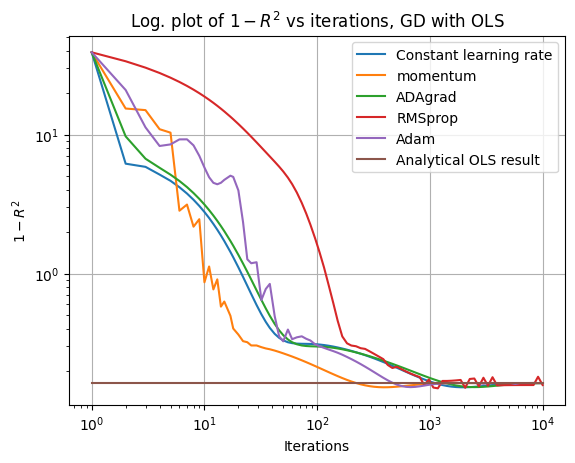

In [ ]:
plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label='Constant learning rate')
plt.plot(mse_data_gd_momentum[0], mse_data_gd_momentum[1], label='Momentum')
plt.plot(mse_data_gd_ADAgrad[0], mse_data_gd_ADAgrad[1], label='ADAgrad')
plt.plot(mse_data_gd_RMSprop[0], mse_data_gd_RMSprop[1], label='RMSprop')
plt.plot(mse_data_gd_Adam[0], mse_data_gd_Adam[1], label='Adam')

sklearn_mse = gd_constant.analytical_OLS_mse()
plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*sklearn_mse,label="Analytical OLS result")


plt.title("Log. plot of $1 - R^2$ vs iterations, GD with OLS")
plt.xlabel("Iterations")
plt.ylabel("$1 - R^2$")
plt.loglog()
plt.grid()
plt.legend(loc="upper right")

plt.show()

In [23]:
# Ridge regression

# Adam, RMSprop, ADAgrad, momentum, constant

#np.random.seed(126)
#theta = np.random.uniform(-1, 1, X.shape[1])

iterations = 10**4

gd_constant = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ConstantLearningRateStep(learning_rate=0.04))
gd_momentum = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=MomentumStep(learning_rate=0.003, momentum=0.7))
gd_ADAgrad = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=ADAgradStep(learning_rate=0.4))
gd_RMSprop = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=RMSpropStep(learning_rate=0.005, decay_rate=0.9))
gd_Adam = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=AdamStep(learning_rate=0.05, beta1=0.9, beta2=0.999))

mse_data_gd_constant_step = gd_constant.train(iterations=iterations)
mse_data_gd_momentum = gd_momentum.train(iterations=iterations)
mse_data_gd_ADAgrad = gd_ADAgrad.train(iterations=iterations)
mse_data_gd_RMSprop = gd_RMSprop.train(iterations=iterations)
mse_data_gd_Adam = gd_Adam.train(iterations=iterations)

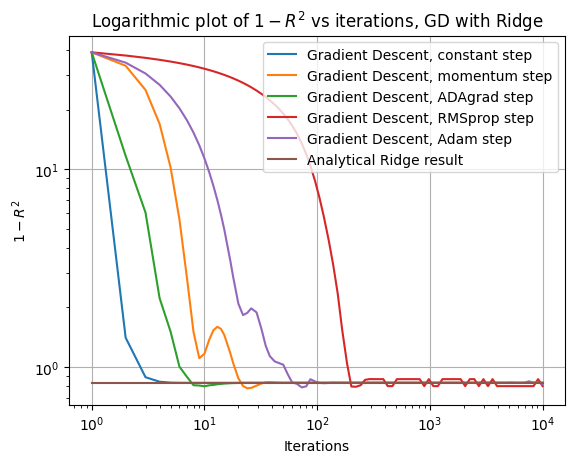

In [24]:
plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label='Gradient Descent, constant step')
plt.plot(mse_data_gd_momentum[0], mse_data_gd_momentum[1], label='Gradient Descent, momentum step')
plt.plot(mse_data_gd_ADAgrad[0], mse_data_gd_ADAgrad[1], label='Gradient Descent, ADAgrad step')
plt.plot(mse_data_gd_RMSprop[0], mse_data_gd_RMSprop[1], label='Gradient Descent, RMSprop step')
plt.plot(mse_data_gd_Adam[0], mse_data_gd_Adam[1], label='Gradient Descent, Adam step')

sklearn_mse = gd_constant.analytical_Ridge_mse(10**1)
plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*sklearn_mse,label="Analytical Ridge result")

plt.title(r"Logarithmic plot of $1 - R^2$ vs iterations, GD with Ridge")
plt.xlabel("Iterations")
plt.ylabel(r"$1 - R^2$")
plt.loglog()
plt.grid()
plt.legend(loc="upper right")

plt.show()

MSE for 10000 iterations for learning_rate =  0.02 :  0.8309035502159257
MSE for 10000 iterations for learning_rate =  0.03 :  0.8329639800796776
MSE for 10000 iterations for learning_rate =  0.04 :  0.8117712341440478
MSE for 10000 iterations for learning_rate =  0.05 :  0.830746482817992
MSE for 10000 iterations for learning_rate =  0.06 :  0.8366447471608518
MSE for 10000 iterations for learning_rate =  0.07 :  0.8172150691549405
MSE for 10000 iterations for learning_rate =  0.08 :  0.8179602276946547
MSE for 10000 iterations for learning_rate =  0.09 :  0.8300636036469772
MSE for 10000 iterations for learning_rate =  0.1 :  0.8308345407815526


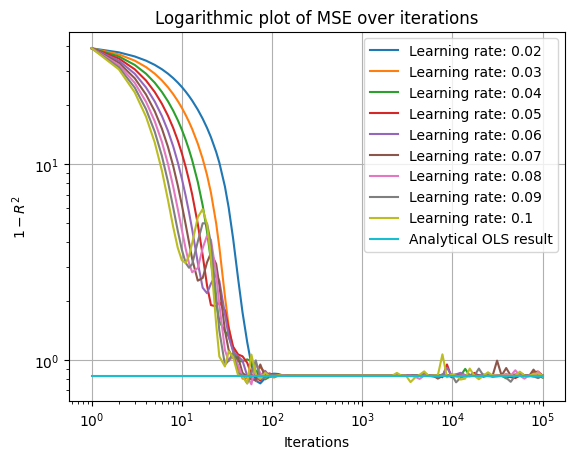

In [25]:
# Ordinary gradient descent for different learning rates, OLS regression
iterations = 10**5

learning_rates = np.linspace(0.02,0.1,9)   # 0.355 for p = 5

for i in range(len(learning_rates)): 
    gd_constant = GradientDescent(X, y, gradient=Ridge_Gradient(10**1), starting_parameters=theta, step_method=AdamStep(learning_rate=learning_rates[i],beta1=0.9, beta2=0.999))
    mse_data_gd_constant_step = gd_constant.train(iterations=iterations)
    analytical_mse = gd_constant.analytical_Ridge_mse(10**1)
    print("MSE for 10000 iterations for learning_rate = ", round(learning_rates[i],5),": ",mse_data_gd_constant_step[1][len(mse_data_gd_constant_step[1]) - 1])
    plt.plot(mse_data_gd_constant_step[0], mse_data_gd_constant_step[1], label=f"Learning rate: {round(learning_rates[i],5)}")

plt.plot(mse_data_gd_constant_step[0],np.ones(len(mse_data_gd_constant_step[0]))*analytical_mse,label="Analytical OLS result")

plt.title("Logarithmic plot of MSE over iterations")
plt.xlabel("Iterations")
plt.ylabel(r"$1 - R^2$")
plt.loglog()
plt.grid()
plt.legend()

plt.show()

## NOTES 

-For OLS regression, momentum: interval of learning rate: 0.1,0.4. Optimal value of 0.3 had few oscillations for the first 10 iterations. Generically, they have a lot of oscillations. All learning rates in this interval converged for roughly the same number of iterations; in particular, their development was roughly the same after ca. 30 iterations, but with some offset in MSE. 

-For OLS regression, Adagrad is very robust for a large interval of learning rates. In particular, for learning rates from 0.3 and above, the evolution of the MSE as a function of iterations develops in almost exactly the same way after roughly 10 iterations. Interval of learning rates: 0.2, 1. Optimal value: 0.3

-OLS regression: For a learning rate larger than roughly 0.01: RMSprop does not converge to correct answer. MSE converges to an answer bigger than analytical one. Interval: 0.001 to 0.009. Optimal value: 0.008

-OLS regression with ADAM: after the solution reached the minimum in the MSE, I found that the solution was unstable around the minimum in the MSE for learning rates larger than roughly 0.10. MSE started oscillating around minimum after between 10^3 and 10^4 iterations. For learning rates larger than roughly 0.03, the MSE converged after roughly the same number of iterations (roughly 2*10^2 iterations). 

Ridge regression: 

-learning rate for momentum between 0.002 and 0.01. For learning rates between roughly 0.002 and 0.1, the momentum gradient descent converged after roughly the same number of iterations (ca. 30 iterations). 

-learning rate for Adagrad between 0.4 and 2.0. For learning rates larger than 0.4, the parameters converged to the minimum after roughly the same number of iterations. Converged after roughly 10 iterations. For larger learning rates, there were more oscillations in the MSE as the parameters converged towards the optimal values. 

-For RMSprop with learning rates larger than roughly 0.01: RMSprop does not converge to correct answer. Moreover, for larger learning rates, there are larger and larger oscillations around the minimum in MSE. Interval: 0.004 to 0.01. 

-For ADAM with learning rates larger than roughly 0.05, the MSE converges after roughly the same number 10^2 of iterations. Bit after 10^4 to 10^5 iterations, the MSE starts to oscillate again. For larger learning rates, the oscillation is larger. 
